## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
epochs = 500
model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.9120 - accuracy: 0.3080 - val_loss: 1.7521 - val_accuracy: 0.3707
Epoch 2/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.6976 - accuracy: 0.3917 - val_loss: 1.7059 - val_accuracy: 0.3992
Epoch 3/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6180 - accuracy: 0.4221 - val_loss: 1.5857 - val_accuracy: 0.4349
Epoch 4/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.5589 - accuracy: 0.4459 - val_loss: 1.5332 - val_accuracy: 0.4557
Epoch 5/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.5063 - accuracy: 0.4623 - val_loss: 1.5266 - val_accuracy: 0.4582
Epoch 6/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.4632 - accuracy: 0.4796 - val_loss: 1.4652 - val_accuracy: 0.4787
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 6s 118us/step - loss: 0.5782 - accuracy: 0.7936 - val_loss: 1.9575 - val_accuracy: 0.5052
Epoch 56/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.5648 - accuracy: 0.7962 - val_loss: 1.9409 - val_accuracy: 0.5140
Epoch 57/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.5398 - accuracy: 0.8075 - val_loss: 1.9833 - val_accuracy: 0.5144
Epoch 58/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.5455 - accuracy: 0.8048 - val_loss: 1.9983 - val_accuracy: 0.5073
Epoch 59/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.5396 - accuracy: 0.8071 - val_loss: 2.0750 - val_accuracy: 0.5057
Epoch 60/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.5272 - accuracy: 0.8109 - val_loss: 2.0818 - val_accuracy: 0.5137
Epoch 61/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.5208 - accuracy: 0.8128 - val

50000/50000 [==============================] - 5s 109us/step - loss: 0.2622 - accuracy: 0.9060 - val_loss: 3.5339 - val_accuracy: 0.4945
Epoch 110/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.2913 - accuracy: 0.8952 - val_loss: 3.5664 - val_accuracy: 0.4983
Epoch 111/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.2546 - accuracy: 0.9090 - val_loss: 3.8389 - val_accuracy: 0.4943
Epoch 112/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.2344 - accuracy: 0.9156 - val_loss: 3.6727 - val_accuracy: 0.4925
Epoch 113/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.2520 - accuracy: 0.9080 - val_loss: 3.6647 - val_accuracy: 0.4984
Epoch 114/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.2128 - accuracy: 0.9235 - val_loss: 3.8109 - val_accuracy: 0.4976
Epoch 115/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.2356 - accuracy: 0.9151

50000/50000 [==============================] - 6s 127us/step - loss: 0.1421 - accuracy: 0.9500 - val_loss: 5.0546 - val_accuracy: 0.4896
Epoch 164/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.2219 - accuracy: 0.9229 - val_loss: 4.9307 - val_accuracy: 0.4850
Epoch 165/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.1984 - accuracy: 0.9309 - val_loss: 5.0271 - val_accuracy: 0.4946
Epoch 166/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.1680 - accuracy: 0.9388 - val_loss: 5.1130 - val_accuracy: 0.4948
Epoch 167/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.1412 - accuracy: 0.9494 - val_loss: 5.1008 - val_accuracy: 0.4926
Epoch 168/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.2181 - accuracy: 0.9259 - val_loss: 5.2164 - val_accuracy: 0.4884
Epoch 169/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.1806 - accuracy: 0.9370

50000/50000 [==============================] - 7s 134us/step - loss: 0.0988 - accuracy: 0.9654 - val_loss: 5.8539 - val_accuracy: 0.4960
Epoch 218/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.0760 - accuracy: 0.9743 - val_loss: 5.9417 - val_accuracy: 0.4931
Epoch 219/500
50000/50000 [==============================] - 7s 130us/step - loss: 0.0853 - accuracy: 0.9700 - val_loss: 5.9025 - val_accuracy: 0.4983
Epoch 220/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.1227 - accuracy: 0.9568 - val_loss: 5.8217 - val_accuracy: 0.4866
Epoch 221/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.1628 - accuracy: 0.9450 - val_loss: 5.9782 - val_accuracy: 0.4829
Epoch 222/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.2109 - accuracy: 0.9316 - val_loss: 5.8968 - val_accuracy: 0.4863
Epoch 223/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.2030 - accuracy: 0.9325

50000/50000 [==============================] - 6s 119us/step - loss: 0.1596 - accuracy: 0.9482 - val_loss: 6.3743 - val_accuracy: 0.4918
Epoch 272/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.1401 - accuracy: 0.9537 - val_loss: 6.3212 - val_accuracy: 0.4896
Epoch 273/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.1371 - accuracy: 0.9537 - val_loss: 6.5621 - val_accuracy: 0.4873
Epoch 274/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0699 - accuracy: 0.9753 - val_loss: 6.4932 - val_accuracy: 0.4937
Epoch 275/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0446 - accuracy: 0.9857 - val_loss: 6.5677 - val_accuracy: 0.4913
Epoch 276/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.0667 - accuracy: 0.9775 - val_loss: 6.7701 - val_accuracy: 0.4912
Epoch 277/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.2222 - accuracy: 0.9322

50000/50000 [==============================] - 6s 123us/step - loss: 0.1274 - accuracy: 0.9576 - val_loss: 7.1550 - val_accuracy: 0.4898
Epoch 326/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.1014 - accuracy: 0.9663 - val_loss: 7.0414 - val_accuracy: 0.4871
Epoch 327/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.0694 - accuracy: 0.9759 - val_loss: 7.1736 - val_accuracy: 0.4980
Epoch 328/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0568 - accuracy: 0.9803 - val_loss: 7.2185 - val_accuracy: 0.4947
Epoch 329/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.1507 - accuracy: 0.9521 - val_loss: 7.1052 - val_accuracy: 0.4748
Epoch 330/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.1368 - accuracy: 0.9554 - val_loss: 7.2780 - val_accuracy: 0.4820
Epoch 331/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0790 - accuracy: 0.9736

50000/50000 [==============================] - 7s 137us/step - loss: 0.1375 - accuracy: 0.9583 - val_loss: 7.5495 - val_accuracy: 0.4937
Epoch 380/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.1289 - accuracy: 0.9593 - val_loss: 7.5065 - val_accuracy: 0.4827
Epoch 381/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.0707 - accuracy: 0.9757 - val_loss: 7.5529 - val_accuracy: 0.4958
Epoch 382/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.0448 - accuracy: 0.9845 - val_loss: 7.5660 - val_accuracy: 0.4946
Epoch 383/500
50000/50000 [==============================] - 7s 135us/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 7.6698 - val_accuracy: 0.4978
Epoch 384/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0165 - accuracy: 0.9952 - val_loss: 7.6056 - val_accuracy: 0.4924
Epoch 385/500
50000/50000 [==============================] - 7s 139us/step - loss: 0.0419 - accuracy: 0.9853

50000/50000 [==============================] - 7s 141us/step - loss: 0.0366 - accuracy: 0.9880 - val_loss: 7.7682 - val_accuracy: 0.4981
Epoch 434/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.0372 - accuracy: 0.9874 - val_loss: 7.8168 - val_accuracy: 0.4932
Epoch 435/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.1288 - accuracy: 0.9602 - val_loss: 7.8266 - val_accuracy: 0.4825
Epoch 436/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.1085 - accuracy: 0.9650 - val_loss: 7.7591 - val_accuracy: 0.4886
Epoch 437/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.0820 - accuracy: 0.9735 - val_loss: 7.5864 - val_accuracy: 0.4926
Epoch 438/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0333 - accuracy: 0.9887 - val_loss: 7.7559 - val_accuracy: 0.4956
Epoch 439/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.0398 - accuracy: 0.9870

50000/50000 [==============================] - 6s 121us/step - loss: 0.0131 - accuracy: 0.9983 - val_loss: 6.1086 - val_accuracy: 0.4996
Epoch 488/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0071 - accuracy: 0.9996 - val_loss: 6.2366 - val_accuracy: 0.5016
Epoch 489/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0048 - accuracy: 0.9999 - val_loss: 6.3364 - val_accuracy: 0.5009
Epoch 490/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0043 - accuracy: 0.9999 - val_loss: 6.4669 - val_accuracy: 0.4997
Epoch 491/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 6.5515 - val_accuracy: 0.5019
Epoch 492/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 6.6188 - val_accuracy: 0.5018
Epoch 493/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.0025 - accuracy: 1.0000

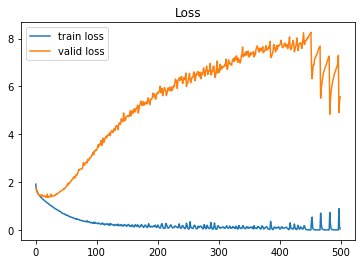

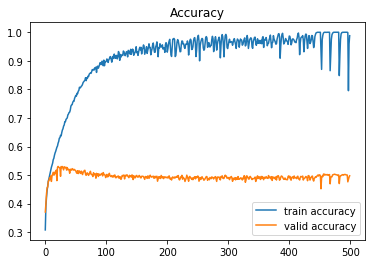

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
#SGD
from keras import optimizers

opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
epochs = 100
model.fit(x_train, y_train, 
          epochs=epochs, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 100us/step - loss: 1.2480 - accuracy: 0.5606 - val_loss: 1.5541 - val_accuracy: 0.4607
Epoch 2/100
50000/50000 [==============================] - 5s 101us/step - loss: 1.2176 - accuracy: 0.5697 - val_loss: 1.4643 - val_accuracy: 0.4897
Epoch 3/100
50000/50000 [==============================] - 5s 109us/step - loss: 1.1953 - accuracy: 0.5762 - val_loss: 1.4115 - val_accuracy: 0.5005
Epoch 4/100
50000/50000 [==============================] - 6s 122us/step - loss: 1.1660 - accuracy: 0.5879 - val_loss: 1.3881 - val_accuracy: 0.5093
Epoch 5/100
50000/50000 [==============================] - 6s 118us/step - loss: 1.1438 - accuracy: 0.5961 - val_loss: 1.4117 - val_accuracy: 0.5003
Epoch 6/100
50000/50000 [==============================] - 6s 130us/step - loss: 1.1188 - accuracy: 0.6057 - val_loss: 1.4425 - val_accuracy: 0.4893
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 5s 98us/step - loss: 0.2431 - accuracy: 0.9155 - val_loss: 2.4533 - val_accuracy: 0.5294
Epoch 56/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.2419 - accuracy: 0.9141 - val_loss: 2.6002 - val_accuracy: 0.5198
Epoch 57/100
50000/50000 [==============================] - 5s 97us/step - loss: 0.2370 - accuracy: 0.9169 - val_loss: 2.6439 - val_accuracy: 0.5191
Epoch 58/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.2269 - accuracy: 0.9205 - val_loss: 2.6089 - val_accuracy: 0.5201
Epoch 59/100
50000/50000 [==============================] - 5s 99us/step - loss: 0.2246 - accuracy: 0.9210 - val_loss: 2.9242 - val_accuracy: 0.5040
Epoch 60/100
50000/50000 [==============================] - 5s 100us/step - loss: 0.2210 - accuracy: 0.9210 - val_loss: 2.6590 - val_accuracy: 0.5305
Epoch 61/100
50000/50000 [==============================] - 5s 108us/step - loss: 0.2177 - accuracy: 0.9226 - val_loss

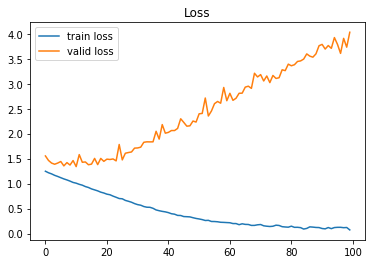

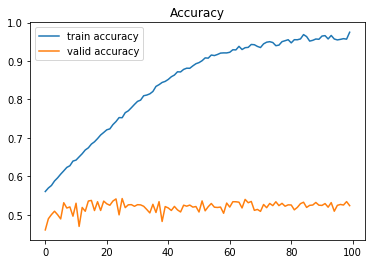

In [14]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()